# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
import requests

pokemon = input('What pokemon do you want information for?')

response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')

if response.status_code == 200:
    print('SUCCESS')
    data = response.json()
else:
    print(f'ERROR, STATUS CODE {response.status_code}')

What pokemon do you want information for?pikachu
SUCCESS


In [2]:
print(data['name'])

pikachu


### Display a Pokemon's name, weight, abilities, and types

In [3]:
# get the name
name = data['name']
print(name)

pikachu


In [4]:
# get types
data['types']

[{'slot': 1,
  'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}]

In [5]:
# get weight
data['weight']

60

In [6]:
# get abilities
data['abilities']

[{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'},
  'is_hidden': False,
  'slot': 1},
 {'ability': {'name': 'lightning-rod',
   'url': 'https://pokeapi.co/api/v2/ability/31/'},
  'is_hidden': True,
  'slot': 3}]

In [7]:
ability_names = [item['ability']['name'] for item in data['abilities']]

In [8]:
ability_names

['static', 'lightning-rod']

In [9]:
# Create a structure for a single pokemon
pokemon = {
    'abilities': ability_names,
    'name': data['name'],
    'types': data['types'],
    'weight': data['weight']
}

In [10]:
pokemon

{'abilities': ['static', 'lightning-rod'],
 'name': 'pikachu',
 'types': [{'slot': 1,
   'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}],
 'weight': 60}

#### Create a function to Pull in your own Pokemon's data 

In [11]:
# Create a function that does the following:
# Asks a user to input a pokemon name
# Requests the poke api for that pokemon's information
# Creates the dictionary from above with that pokemons information
    # In addition to the above keys, include the height and the "front_default" sprite
# Returns the dictionary

def poke_api_call(pokemon=None):
    if not pokemon:
        pokemon = input('What pokemon do you want to select?')
    
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')

    if response.status_code == 200:
        print('SUCCESS')
        data = response.json()
    else:
        print(f'ERROR, STATUS CODE {response.status_code}')
        return 'Error'
    
    ability_names = [item['ability']['name'] for item in data['abilities']]
    
    poke_dict = {
        'abilities': ability_names,
        'name': data['name'],
        'types': data['types'],
        'weight': data['weight'],
        'height': data['height'],
        'sprite': data['sprites']['front_default']
    }
    
    return poke_dict

In [12]:
poke_api_call('pikachu')

SUCCESS


{'abilities': ['static', 'lightning-rod'],
 'name': 'pikachu',
 'types': [{'slot': 1,
   'type': {'name': 'electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}}],
 'weight': 60,
 'height': 4,
 'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/25.png'}

Choose your pokemon

In [13]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


your_team_pokemon = []

for teammate in your_team:
    your_team_pokemon.append(poke_api_call(teammate))

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [14]:
list(map(poke_api_call, your_team))

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


[{'abilities': ['static', 'vital-spirit'],
  'name': 'electabuzz',
  'types': [{'slot': 1,
    'type': {'name': 'electric',
     'url': 'https://pokeapi.co/api/v2/type/13/'}}],
  'weight': 300,
  'height': 11,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/125.png'},
 {'abilities': ['levitate'],
  'name': 'haunter',
  'types': [{'slot': 1,
    'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}},
   {'slot': 2,
    'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}],
  'weight': 1,
  'height': 16,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/93.png'},
 {'abilities': ['sand-stream', 'unnerve'],
  'name': 'tyranitar',
  'types': [{'slot': 1,
    'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}},
   {'slot': 2,
    'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}],
  'weight': 2020,
  'height': 20,
  'sprite': 'https://raw.githubu

In [15]:
your_team_pokemon

[{'abilities': ['static', 'vital-spirit'],
  'name': 'electabuzz',
  'types': [{'slot': 1,
    'type': {'name': 'electric',
     'url': 'https://pokeapi.co/api/v2/type/13/'}}],
  'weight': 300,
  'height': 11,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/125.png'},
 {'abilities': ['levitate'],
  'name': 'haunter',
  'types': [{'slot': 1,
    'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}},
   {'slot': 2,
    'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}],
  'weight': 1,
  'height': 16,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/93.png'},
 {'abilities': ['sand-stream', 'unnerve'],
  'name': 'tyranitar',
  'types': [{'slot': 1,
    'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}},
   {'slot': 2,
    'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}],
  'weight': 2020,
  'height': 20,
  'sprite': 'https://raw.githubu

In [16]:
random_team

[753, 68, 727, 489, 878, 229]

In [17]:
random_team_pokemon = []

for teammate in random_team:
    random_team_pokemon.append(poke_api_call(teammate))

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [18]:
random_team_pokemon

[{'abilities': ['leaf-guard', 'contrary'],
  'name': 'fomantis',
  'types': [{'slot': 1,
    'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}}],
  'weight': 15,
  'height': 3,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/753.png'},
 {'abilities': ['guts', 'no-guard', 'steadfast'],
  'name': 'machamp',
  'types': [{'slot': 1,
    'type': {'name': 'fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'}}],
  'weight': 1300,
  'height': 16,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/68.png'},
 {'abilities': ['blaze', 'intimidate'],
  'name': 'incineroar',
  'types': [{'slot': 1,
    'type': {'name': 'fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}},
   {'slot': 2,
    'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}],
  'weight': 830,
  'height': 18,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/727.png'},
 {'abilities':

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [19]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for teammate in your_team:
    my_six_pokemon[teammate] = poke_api_call(teammate)

SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [20]:
my_six_pokemon

{'electabuzz': {'abilities': ['static', 'vital-spirit'],
  'name': 'electabuzz',
  'types': [{'slot': 1,
    'type': {'name': 'electric',
     'url': 'https://pokeapi.co/api/v2/type/13/'}}],
  'weight': 300,
  'height': 11,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/125.png'},
 'haunter': {'abilities': ['levitate'],
  'name': 'haunter',
  'types': [{'slot': 1,
    'type': {'name': 'ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}},
   {'slot': 2,
    'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}],
  'weight': 1,
  'height': 16,
  'sprite': 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/93.png'},
 'tyranitar': {'abilities': ['sand-stream', 'unnerve'],
  'name': 'tyranitar',
  'types': [{'slot': 1,
    'type': {'name': 'rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}},
   {'slot': 2,
    'type': {'name': 'dark', 'url': 'https://pokeapi.co/api/v2/type/17/'}}],
  'weight': 2020,
  'height'

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [21]:
poke_dict = {
    'abilities': ability_names,
    'name': data['name'],
    'types': data['types'],
    'weight': data['weight'],
    'height': data['height'],
    'sprite': data['sprites']['front_default']
}

In [22]:
class Pokemon():
    def __init__(self, name):
        self.abilities = []
        self.name = name
        self.types = []
        self.weight = None
        self.height = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')

        if response.status_code == 200:
            data = response.json()
        else:
            return 'Error'

        ability_names = [item['ability']['name'] for item in data['abilities']]
        
        self.types = data['types']
        self.abilities = ability_names
        self.weight = data['weight']
        self.height = data['height']
        self.sprite = data['sprites']['front_default']
        
    def evolve(self):
        new_poke = input("What pokemon should you evolve into?")
        self.name = new_poke
        self.poke_api_call()

In [23]:
pikachu = Pokemon('pikachu')

In [24]:
print(pikachu.weight)

60


### Let's Catch some Pokemon

In [25]:
class Pokedex:
    def __init__(self, player_name):
        self.player_name = player_name
        self.pokemon = {}
        
    def add_pokemon(self, name):
        self.pokemon[name] = Pokemon(name)
        print(f"{name} was added to {self.player_name}'s pokedex.")

    # Add a pokemon lookup method to lookup a pokemon and display it's information (In a user friendly way)

In [26]:
dylans_pokedex = Pokedex('dylan')

In [27]:
dylans_pokedex.add_pokemon('ho-oh')

ho-oh was added to dylan's pokedex.


In [28]:
dylans_pokedex.pokemon

{'ho-oh': <__main__.Pokemon at 0x18cb5fabb20>}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

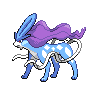

In [29]:
# Display an image in Jupyter notebook
from IPython.display import Image

display(Image('https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/245.png', width = 200))


In [32]:
# recreate your pokemon class here
class Pokemon:
    def __init__(self,name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
    def poke_api_call(self):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'], types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            self.sprite = data['sprites']['front_default']
            # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
    def display_pokemon(self):
        display(Image(self.sprite, width = 300))

In [33]:
pikachu = Pokemon('pikachu')







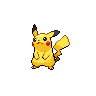

In [34]:
pikachu.display_pokemon()


In [18]:
# Calling our new method


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [321]:
# Create a method for your Pokemon class that takes in user input, 
# to ask what new pokemon your current pokemon should evolve into.

In [ ]:
# Create a method
# Take in user input, should be a pokemons name
# Update the current pokemon's attributes (their height, weight, sprite, etc.) to the new pokemon's values


Now let's evolve a few

In [92]:
pikachu = Pokemon('pikachu')

print(pikachu.sprite)

https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/25.png


In [93]:
pikachu.evolve()

What pokemon should you evolve into?raichu


In [94]:
pikachu.sprite


'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/26.png'

#  Final Exercise (Optional): <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
